In [3]:
import numpy as np
from itertools import product

In [1217]:
a = np.array([[0, 1], [1, 0]])
b = np.array([[[5, 0], [0, 5]], [[10, 0], [0, 10]]])
print(np.matmul(a, b))
print(a @ b)

[[[ 0  5]
  [ 5  0]]

 [[ 0 10]
  [10  0]]]
[[[ 0  5]
  [ 5  0]]

 [[ 0 10]
  [10  0]]]


In [1219]:
h = np.array([[
 [ 3,  4,  5],
 [ 6 , 7,  8],
 [ 9, 10, 11]], [[ 0,  1,  2],
 [ 3,  4,  5],
 [ 6 , 7,  8]]])
k = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]])

d = np.transpose(np.inner(h, k))
print(h.shape)
print(k.shape)
print(d.shape)

d = np.moveaxis(d, -1, 0)
print(d.shape)
print(d - k)

(2, 3, 3)
(4, 3)
(4, 3, 2)
(2, 4, 3)
[[[ 14  22  30]
  [ 47  82 117]
  [ 80 142 204]
  [113 202 291]]

 [[  5  13  21]
  [ 11  46  81]
  [ 17  79 141]
  [ 23 112 201]]]


In [1221]:
open_sites = 9
x = np.array([i for i in product(range(2), repeat=open_sites)])
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 ...
 [1 1 1 ... 1 0 1]
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 1]]


In [1223]:
#4-fold symmetry, mirror plane ### format of below array is [symmetry matrix, number of opertations to give the identity matrix]
symmertry_matricies = [[np.zeros((9, 9)), 4], [np.kron(np.eye(3), [[0, 0, 1], [0, 1, 0], [1, 0, 0]]), 1]]
symmertry_matricies[0][0][0, 6], symmertry_matricies[0][0][1, 3], symmertry_matricies[0][0][2, 0], symmertry_matricies[0][0][3, 7], symmertry_matricies[0][0][4, 4], symmertry_matricies[0][0][5, 1], symmertry_matricies[0][0][6, 8], symmertry_matricies[0][0][7, 5], symmertry_matricies[0][0][8, 2] = np.ones((9))
#can probaly do this with tensor products

print(symmertry_matricies[1][0])

[[0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [1225]:
#create all symmetry matricies which may create unique configurations
unique_symm_mat = []
for i in symmertry_matricies:
    o = i[0]
    for n in range(i[1]):
        unique_symm_mat.append(o)
        o = np.matmul(o, i[0])
rot_mat = np.matmul(np.array(unique_symm_mat[0: 3]), unique_symm_mat[4])
print(rot_mat)
print(len(unique_symm_mat))

for i in rot_mat:
    unique_symm_mat.append(i)
        
unique_symm_mat = np.array(unique_symm_mat)
print(unique_symm_mat.shape)

[[[0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0.]]

 [[1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1.]]]
5
(8, 9, 9)


In [1227]:
g = np.inner(unique_symm_mat, x)
l = g
v = np.swapaxes(g, -1, -2)
v = x - v
v = np.swapaxes(v, 0, 1)
f = 288
print(x[f])
print(v[f])

print(v.shape)

g = np.moveaxis(g, -1, 0)
print(g.shape)
print(np.unique(v[f], axis=0))
print(np.unique(g[f], axis=0))

[1 0 0 1 0 0 0 0 0]
[[ 1. -1. -1.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  1.  0. -1.  0.  0. -1.]
 [ 1.  0.  0.  1.  0.  0. -1. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0. -1.  1.  0. -1.  0.  0.  0.]
 [ 1.  0.  0.  1.  0.  0.  0. -1. -1.]
 [ 1.  0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0. -1.  0.  1.  0.  0.  0.  0.  0.]]
(512, 8, 9)
(512, 8, 9)
[[ 0. -1.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -1. -1.  1.  0.  0.  0.  0.  0.]
 [ 1.  0. -1.  1.  0. -1.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0. -1.  0.  0.]
 [ 1.  0.  0.  1.  0. -1.  0.  0. -1.]
 [ 1.  0.  0.  1.  0.  0. -1. -1.  0.]
 [ 1.  0.  0.  1.  0.  0.  0. -1. -1.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [1229]:
count = 0
orbits = []
for config in v:
    checked = 0
    for symm_map in config:
        non_zero = symm_map[next((i for i, x in enumerate(symm_map) if x), 0)]
        if non_zero < 0:
            break
        elif non_zero > 0:
            checked += 1
            continue
        checked += 1
    if checked == open_sites-1:
        orbits.append(np.unique(g[count], axis=0))
    count += 1
    
#orbits = np.unique(orbits, axis=0)


#print(len(orbits))
unique = 0
for i in orbits:
    unique += len(i)

print('Total permutations found = ' + str(unique))

t = 0
onesandzeros = [0]
for i in orbits: 
    if np.sum(i[0]) == 1:
        print(t)
        onesandzeros.append(t)
        print(i)
    t += 1

for i in sorted(onesandzeros, reverse=True):
    del orbits[i]
    
for i in orbits: 
    if np.sum(i[0]) == 1:
        print(i)

unique = 0
for i in orbits:
    unique += len(i)

print('Total permutations found = ' + str(unique))
print('Unique configurations found = ' + str(len(orbits)))

Total permutations found = 512
1
[[0. 0. 0. 0. 1. 0. 0. 0. 0.]]
2
[[0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]]
12
[[0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Total permutations found = 502
Unique configurations found = 98


In [1231]:
import pickle
with open('Orbits.pickle', 'wb') as handle:
    pickle.dump(orbits, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [1029]:
trans_symm = [0, 16, 1, 24, 2, 62, 3, 12, 6, 50, 37, 7, 68, 26, 28, 14, 31, 39, 74, 43, 80, 4, 20, 41, 52, 58, 86]
rem_row = [92, 56, 44, 30, 10]
trans_symm, rem_row = sorted(trans_symm), sorted(rem_row)
remove_indicies = trans_symm + rem_row
remove_indicies = sorted(remove_indicies)

print(trans_symm)
print(len(trans_symm))
print(rem_row)
print(len(rem_row))
print(remove_indicies)
print(len(remove_indicies))

[0, 1, 2, 3, 4, 6, 7, 12, 14, 16, 20, 24, 26, 28, 31, 37, 39, 41, 43, 50, 52, 58, 62, 68, 74, 80, 86]
27
[10, 30, 44, 56, 92]
5
[0, 1, 2, 3, 4, 6, 7, 10, 12, 14, 16, 20, 24, 26, 28, 30, 31, 37, 39, 41, 43, 44, 50, 52, 56, 58, 62, 68, 74, 80, 86, 92]
32


In [1169]:

with open('Orbits.pickle', 'rb') as handle:
    b = pickle.load(handle)

print(type(b))
print(type(b[0]))
print(type(b[0][0]))
print(len(b))
print(b)


<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
98
[array([[0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0.]]), array([[0., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0.]]), array([[0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 1., 0.]]), array([[0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0.]]), array([[0., 0., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0.]]), array([[0., 1., 0., 1., 0., 1., 0., 1., 0.]]), array([[0., 0., 0., 0., 1., 1., 0., 1., 0.],
       [0., 0., 0., 1., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 1., 0., 0., 0.],
       [0., 1., 0., 1

In [1075]:
g = [[1, 0, 0], [9, 1, 2]]
print(type(np.fliplr(np.rot90(g))))

<class 'numpy.ndarray'>


In [1329]:
symm_2 = [ [[1, 0, 1]], [[1, 1]], [[1, 1, 1]], [[1, 0], [0, 1]], [[1, 1, 1], [1, 1, 1]], [[1, 1], [0, 0], [1, 1]] ]
symm_4 = [ [[0, 1, 0], [1, 0, 1]], [[1, 1], [1, 0]], [[0, 1, 0], [1, 1, 1]], [[1, 1, 1], [1, 0, 1]] ]
symm_4_m = [ [[1, 1], [0, 0], [1, 0]], [[1, 1, 0], [0, 0, 1]], [[1, 1], [0, 1], [0, 1]], [[1, 1, 0], [1, 0, 1]], [[1, 1, 1], [1, 1, 0]]  ]
symm_2_m = [ [[1, 1, 0], [0, 1, 1]], [[1, 0, 0], [0, 0, 1]] ]
print(len(symm_2) + len(symm_4) + len(symm_2_m) + len(symm_4_m))

for i in range(len(symm_2)):
    new = []
    new.append(np.array(symm_2[i]))
    new.append(np.rot90(symm_2[i]))
    symm_2[i] = new

for i in range(len(symm_4)):
    new = []
    transformed = np.array(symm_4[i])
    for u in range(4):
        new.append(transformed)
        transformed = np.rot90(transformed)
    symm_4[i] = new

for i in range(len(symm_4_m)):
    new = []
    transformed = np.array(symm_4_m[i])
    for s in range(2):
        for u in range(4):
            new.append(transformed)
            transformed = np.rot90(transformed)
        transformed = np.fliplr(symm_4_m[i])
    symm_4_m[i] = new

for i in range(len(symm_2_m)):
    new = []
    transformed = np.array(symm_2_m[i])
    for s in range(2):
        for u in range(2):
            new.append(transformed)
            transformed = np.rot90(transformed)
        transformed = np.fliplr(symm_2_m[i])
    symm_2_m[i] = new

corrected_orbits = []

new_orbits = [ symm_2, symm_4, symm_4_m, symm_2_m, [[np.array([[1, 1], [1, 1]])]], [[np.array([[1]])]] ]
for w in new_orbits:
    for p in w:
        corrected_orbits.append(p)

print(corrected_orbits[-2])

     

17
[array([[1, 1],
       [1, 1]])]


In [1321]:
#load previous data
with open('Orbits.pickle', 'rb') as handle:
    b = pickle.load(handle)

#convert to 3x3 matricies
# for u in range(len(b)):
#     b[u] = b[u].reshape((-1, 3, 3))

#remove orbits with at least one row or column full of 0's (as we simplify or combine these)
for i in remove_indicies[::-1]:
    b.pop(i)

#re add removed orbits with the more optimized correct orbits calculated above
for j in corrected_orbits:
    b.append(j)

#pad all kernels
# optimized_orbits = []
# x = 0
# for r in b:
#     y = 0
#     orb = []
#     for l in r:
#         kernel = np.pad(l, 1, 'constant', constant_values=((0, 0), (0, 0)))
#         orb.append(kernel)
#         y += 1
#     optimized_orbits.append(orb)
#     x += 1

print(b[0])

AttributeError: 'list' object has no attribute 'reshape'

In [1335]:
print(b[67])

[array([[1, 1]]), array([[1],
       [1]])]


In [1281]:
#save orbits
with open('Orbits.pickle', 'wb') as handle:
    pickle.dump(b, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [1317]:
test_config = b[69][-1]
yax, xax = test_config.shape
print(test_config)
print(test_config.flatten())
print(test_config)
print(yax)
print(xax)


testing_stuff = np.nonzero(test_config.flatten())[0]
print(testing_stuff)

[[0 1]
 [1 0]]
[0 1 1 0]
[[0 1]
 [1 0]]
2
2
[1 2]


In [1365]:
which = 0

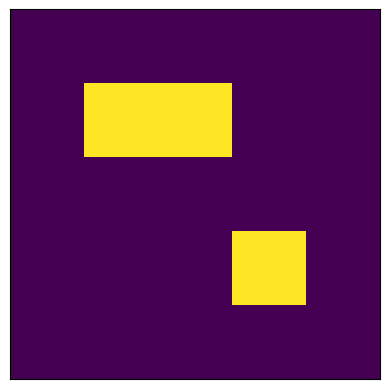

In [1381]:
import math
import matplotlib.pyplot as plt



fig, axis = plt.subplots(1, 1)
no = 12

config = b[no][7]

config = np.select([config == 0], [-1], config)
config = np.pad(config, 1, 'constant', constant_values=((-1, -1), (-1, -1)))

axis.matshow(config)
# Hide X and Y axes label marks
axis.xaxis.set_tick_params(labelbottom=False)
axis.yaxis.set_tick_params(labelleft=False)

    # Hide X and Y axes tick marks
axis.set_xticks([])
axis.set_yticks([])

plt.savefig(f'{which}_isomorph_rejection.png', bbox_inches='tight')
which += 1

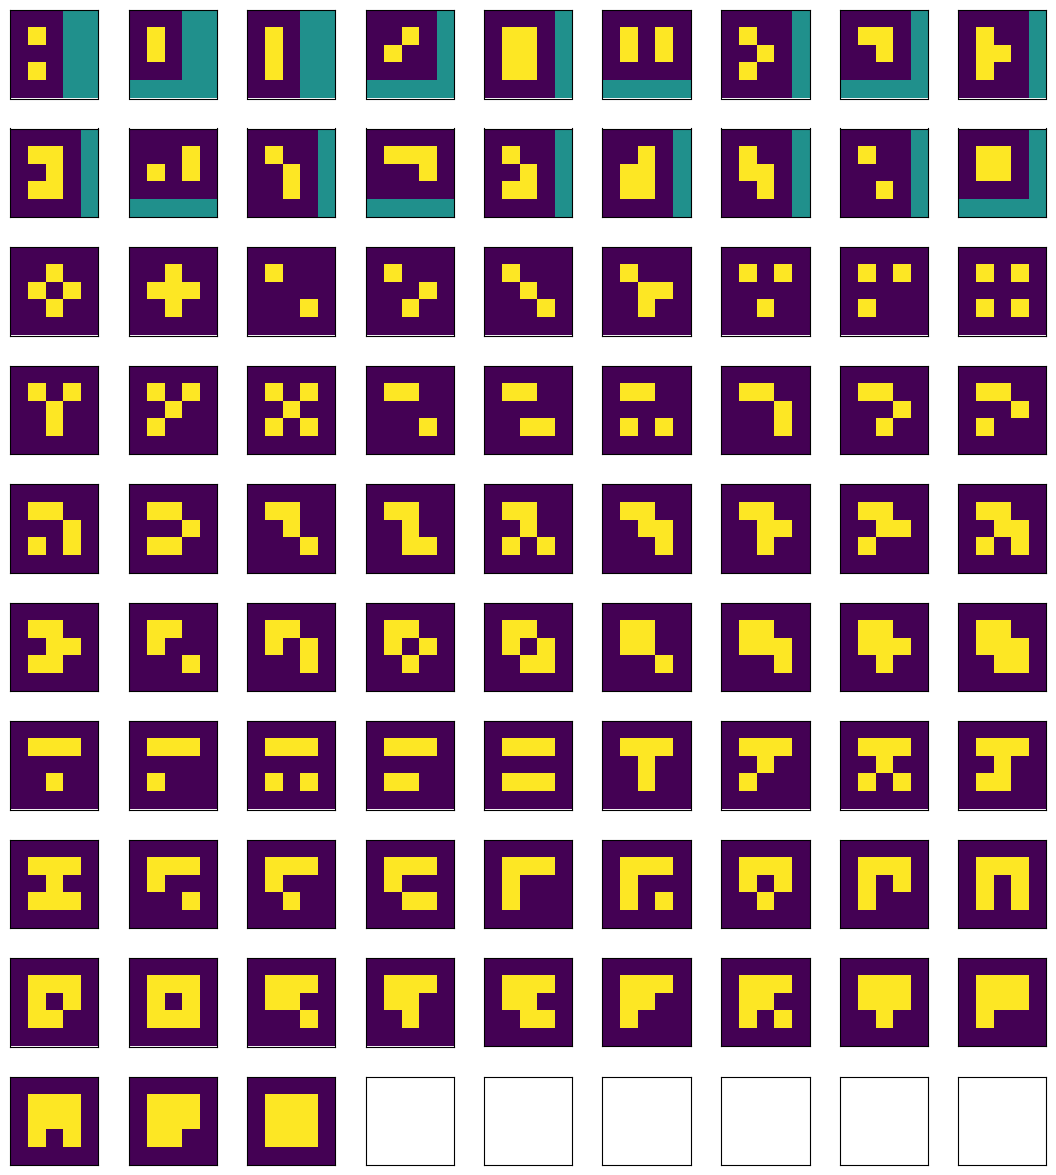

In [1349]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

dims = int(math.ceil(np.sqrt(len(b))))

fig = plt.figure(figsize=(1.5*dims, 1.5*dims))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                    nrows_ncols=(10, 9),  # creates grid of Axes
                    axes_pad=0.3,   # pad between Axes in inch.
                    )


what = 0
count = 66
for ax in grid[0:84]:
    # Iterating over the grid returns the Axes.
    if count == len(b):
        break
    kernel = b[count][-1]
    kernel = np.select([kernel == 0], [-1], kernel)
    kernel = np.pad(kernel, 1, 'constant', constant_values=((-1, -1), (-1, -1)))
    
    if count == 65 and what == 1:
        count = 84
        
    if count >= 66:
        #cmap = 'CMRmap'
        #color = 'red'
        r, c = 0, 0
        B = np.zeros((5, 5))
        B[r:r+kernel.shape[0], c:c+kernel.shape[1]] = kernel
        kernel = B
        
    else:
        cmap = 'viridis'
        color = 'black'
    if count == 83:
        count = -1
        what = 1

    
    
    cax = ax.matshow(kernel, cmap=cmap)
    #cax.set_clim(0, 1)
    
    # Hide X and Y axes label marks
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)

    # Hide X and Y axes tick marks
    ax.set_xticks([])
    ax.set_yticks([])
    
    
    #ax.set_title(str(count), color=color)
    count += 1

#cbar.ax.set_ylabel('Probability of detecting spin up state', fontsize=16)
plt.savefig(f'Repersentatives.pdf', bbox_inches='tight')
plt.show()

In [792]:
s = np.array([0, 0, 0, 0, 1, 0])
nze = next((i for i, x in enumerate(s) if x), 0)
print(s[nze])
if type(s[nze]) == np.ndarray:
    print('works')

print(type(s[nze]))

1
<class 'numpy.int64'>


In [862]:
k = 'True'
if type(k) == str:
    print(k)

True


In [891]:
print(np.sum([[0, 1], [0, 5], [0, 2]], axis=-1))

[1 5 2]


In [909]:

lst = [0, 1, 0, 1, 0, 1, 5, 3, 2]
a = np.array(lst)
nslices = 3
print(a.reshape(nslices, -1))


[[0 1 0]
 [1 0 1]
 [5 3 2]]


In [913]:
a = [1,5, 10]
b = [-1, -5, -10]
for i, n in zip(a, b):
    print(i)
    print(n)

1
-1
5
-5
10
-10


In [915]:
print(np.zeros(3))

[0. 0. 0.]


In [1017]:
s = np.array([[[1, 1, 1, 2, 2, 2, 0 , 0, 0] ]*2]*2)
print(s)
print(s.shape)
s = s.reshape((-1, 3, 3))
print(s)
print(s.shape)

[[[1 1 1 2 2 2 0 0 0]
  [1 1 1 2 2 2 0 0 0]]

 [[1 1 1 2 2 2 0 0 0]
  [1 1 1 2 2 2 0 0 0]]]
(2, 2, 9)
[[[1 1 1]
  [2 2 2]
  [0 0 0]]

 [[1 1 1]
  [2 2 2]
  [0 0 0]]

 [[1 1 1]
  [2 2 2]
  [0 0 0]]

 [[1 1 1]
  [2 2 2]
  [0 0 0]]]
(4, 3, 3)
